<a href="https://colab.research.google.com/github/sula15/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [26]:
# Pick a manual seed for randomization
torch.manual_seed(30)
# Create an instance of model
model = Model()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [29]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [30]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)
my_df

<ipython-input-30-355b53c0d541>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [32]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [35]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [36]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [37]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [38]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1693464517593384
Epoch: 10 and loss: 1.0425225496292114
Epoch: 20 and loss: 0.9181672930717468
Epoch: 30 and loss: 0.647976815700531
Epoch: 40 and loss: 0.45246782898902893
Epoch: 50 and loss: 0.30702248215675354
Epoch: 60 and loss: 0.17922578752040863
Epoch: 70 and loss: 0.10770022124052048
Epoch: 80 and loss: 0.0759068951010704
Epoch: 90 and loss: 0.06145031750202179


Text(0.5, 0, 'Epoch')

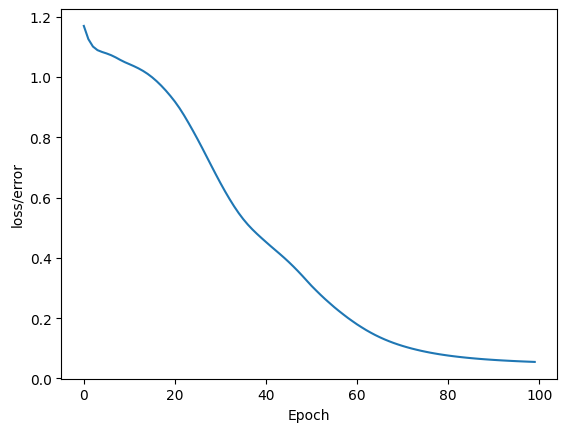

In [39]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [40]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [41]:
loss

tensor(0.0858)

In [42]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([ 17.3322,  11.4964, -14.5622]) 	 0 	 0
2.)  tensor([ 17.7481,  11.9074, -14.8118]) 	 0 	 0
3.)  tensor([ 15.4589,  10.2350, -13.0282]) 	 0 	 0
4.)  tensor([-7.1832,  4.6249, 10.0390]) 	 2 	 2
5.)  tensor([2.5875, 8.0153, 0.4037]) 	 1 	 1
6.)  tensor([2.0078, 7.4144, 0.7636]) 	 1 	 1
7.)  tensor([-4.2486,  6.0439,  7.3626]) 	 2 	 2
8.)  tensor([-6.4982,  5.7554,  9.8881]) 	 2 	 2
9.)  tensor([2.2155, 8.4658, 1.0533]) 	 1 	 1
10.)  tensor([-8.0804,  5.5843, 11.4690]) 	 2 	 2
11.)  tensor([ 15.3080,  10.0152, -12.8555]) 	 0 	 0
12.)  tensor([-7.2991,  5.0731, 10.3454]) 	 2 	 2
13.)  tensor([ 3.4266,  7.4623, -0.8395]) 	 1 	 1
14.)  tensor([1.0260, 7.4454, 1.9227]) 	 1 	 1
15.)  tensor([ 14.8656,   9.8297, -12.5227]) 	 0 	 0
16.)  tensor([1.6583, 8.1124, 1.5170]) 	 1 	 1
17.)  tensor([ 18.9748,  12.1829, -15.8521]) 	 0 	 0
18.)  tensor([ 16.1992,  10.6177, -13.6124]) 	 0 	 0
19.)  tensor([ 15.1557,  10.5172, -12.6210]) 	 0 	 0
20.)  tensor([-3.1993,  6.2897,  6.2220]) 	 1 	 1


In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [ ]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [ ]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])


In [ ]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [ ]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [ ]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)